# DataSet:

**Based on some factor we are,  going to predict the weathers..**

* date : dates
* precipitation : All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle
* temp_max : Maximum Temperature
* temp_min : Minimum Temperature
* wind : Wind speed
* weather : weathers types

<h3>DataSet Link</h3>

https://www.kaggle.com/ananthr1/weather-prediction

In [47]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [48]:
#Load the dataset
data = pd.read_csv("seattle-weather.csv")

In [49]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [50]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [52]:
#Check for null values
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [53]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [54]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

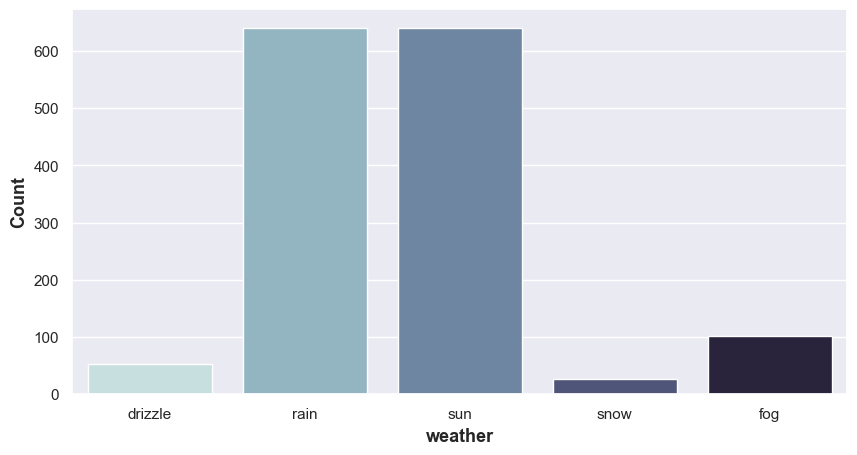

In [55]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

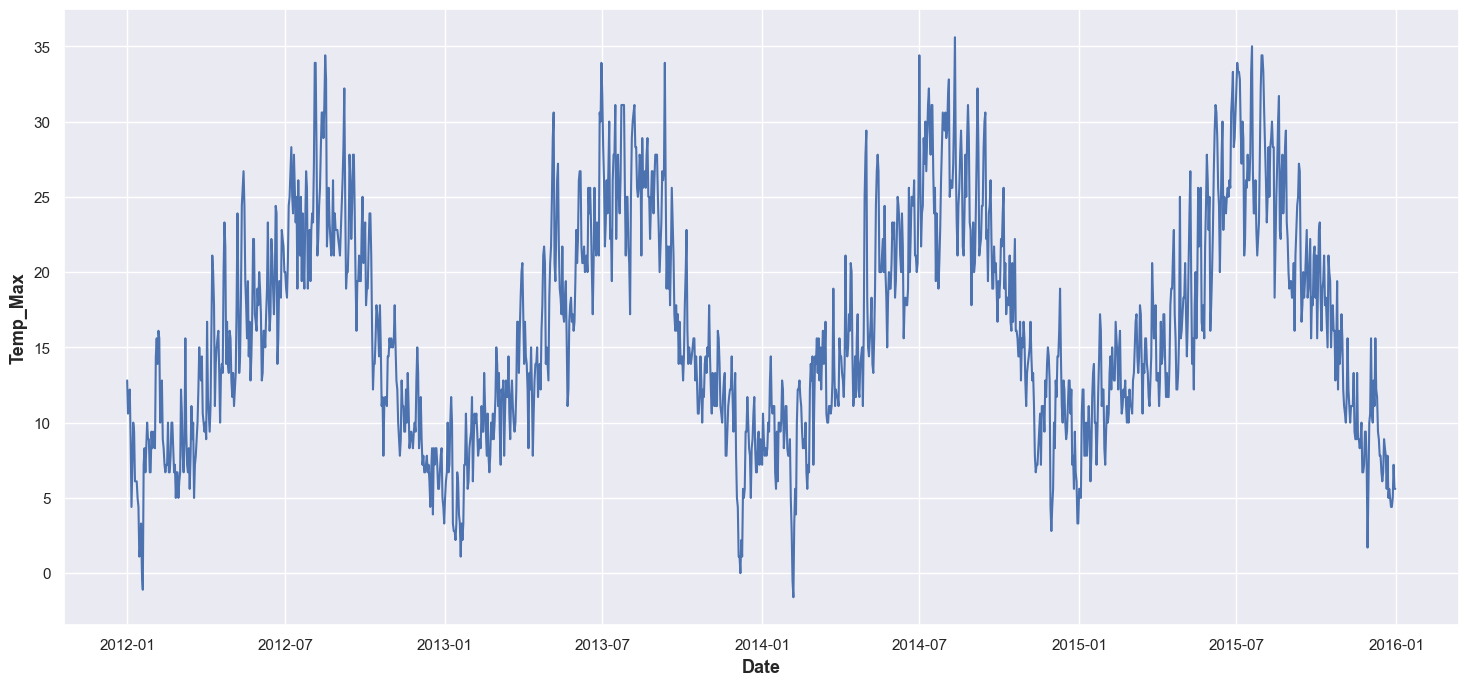

In [56]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

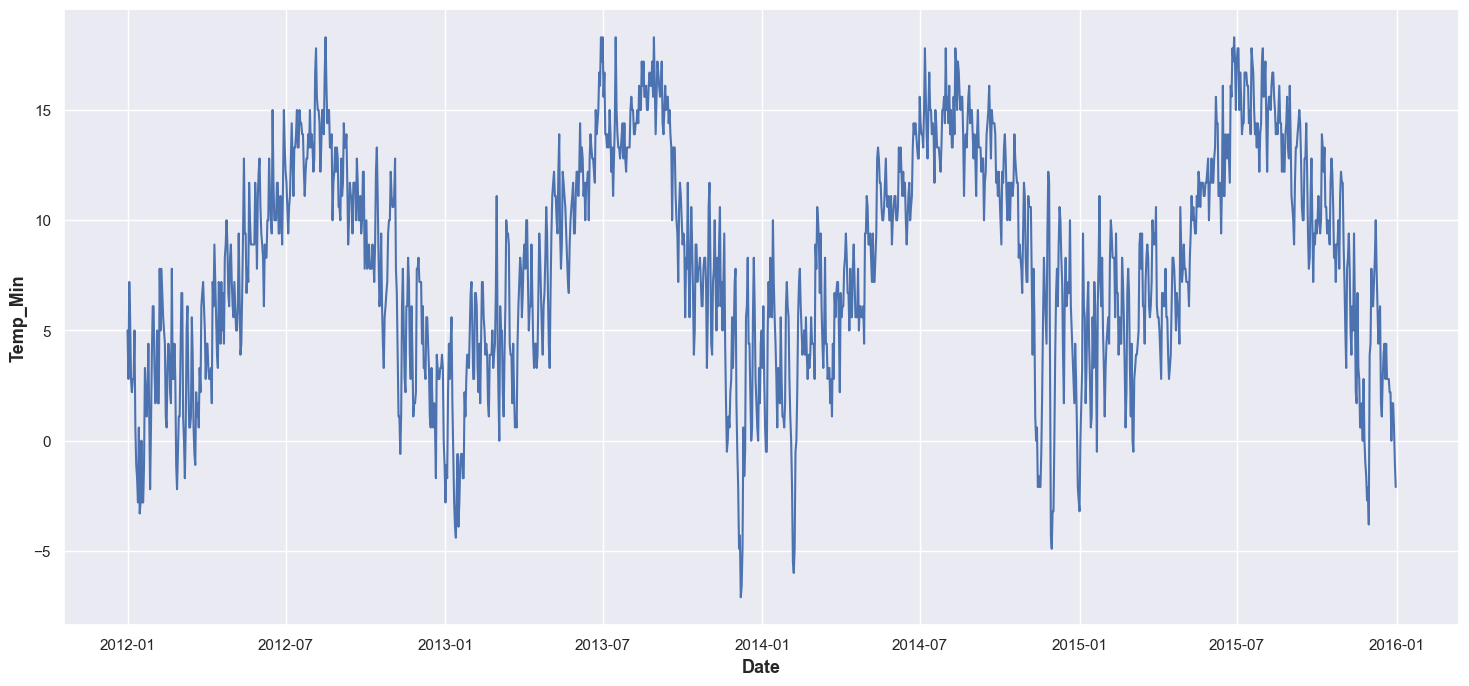

In [57]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

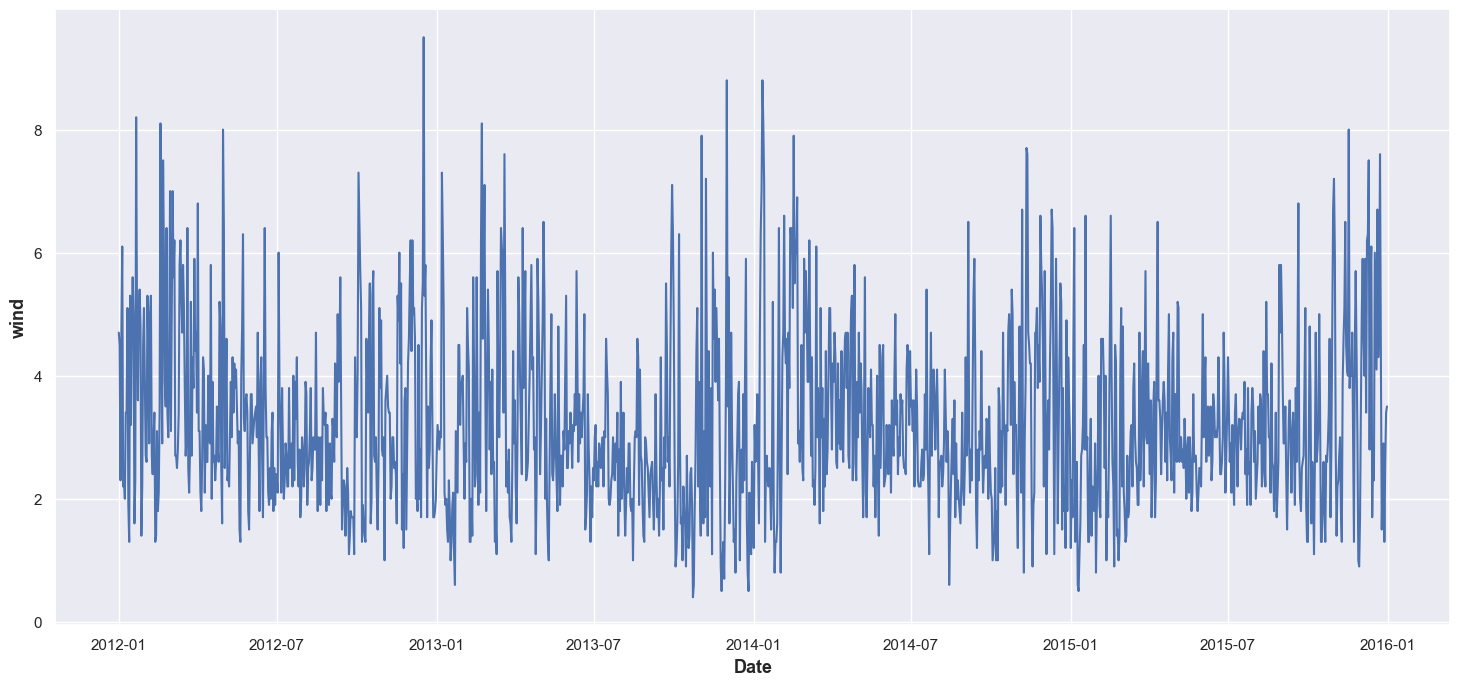

In [58]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

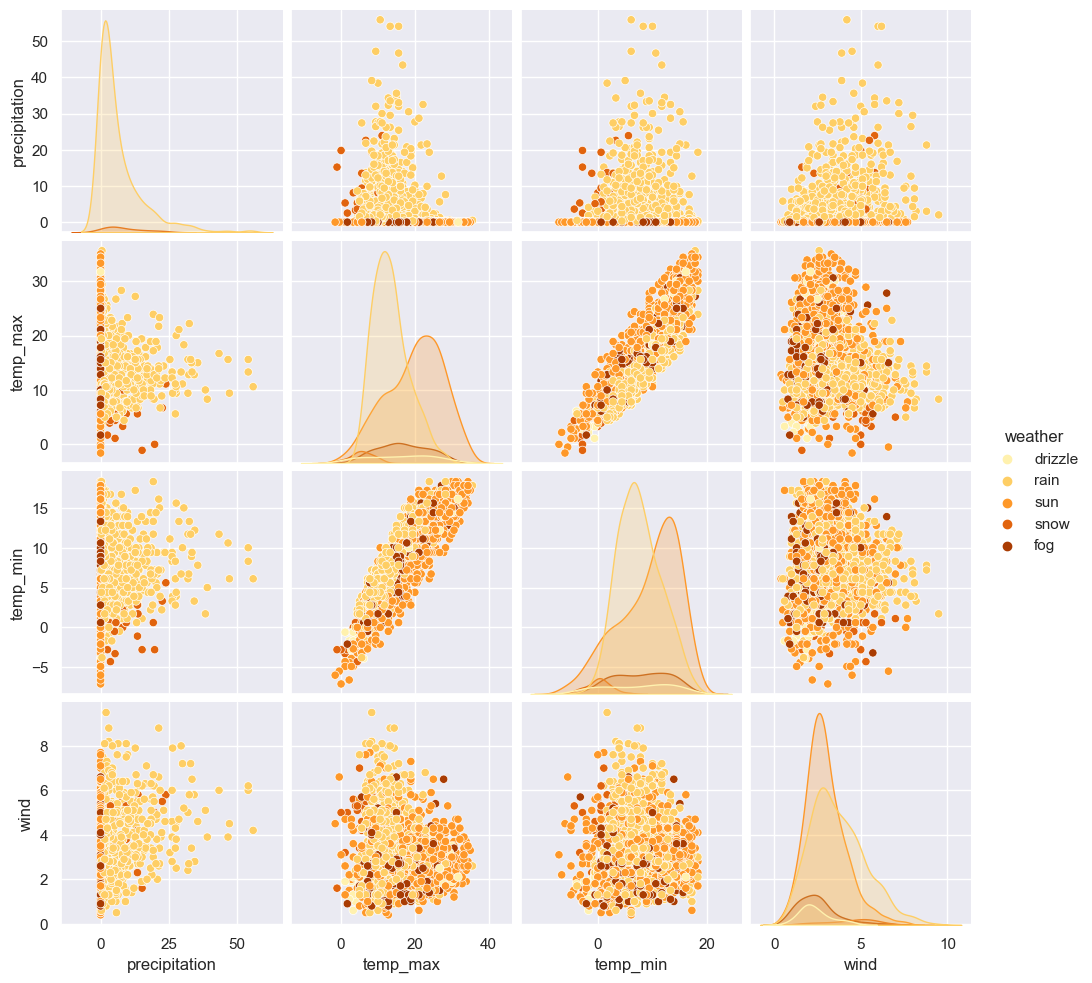

In [59]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

C:\Users\Shyam Surya G\AppData\Local\Temp\ipykernel_21800\3814060822.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")


<Figure size 1000x500 with 0 Axes>

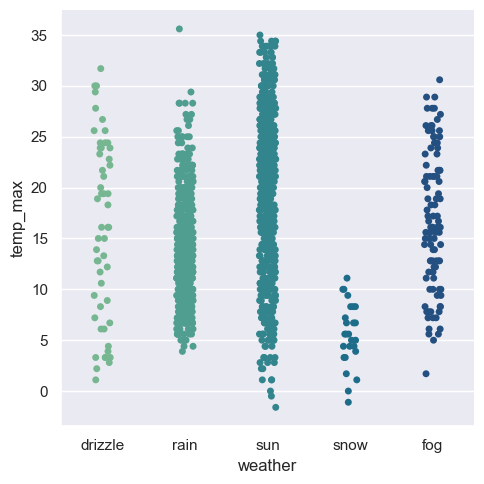

In [60]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
plt.show()

C:\Users\Shyam Surya G\AppData\Local\Temp\ipykernel_21800\1093999663.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")


<Figure size 1000x500 with 0 Axes>

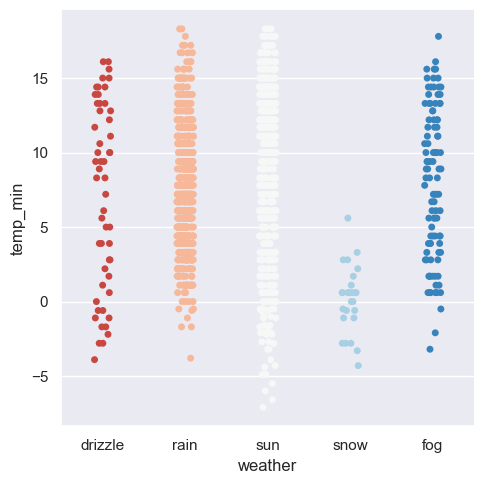

In [61]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")
plt.show()

C:\Users\Shyam Surya G\AppData\Local\Temp\ipykernel_21800\1991129908.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='wind',data=data,palette = "magma")


<Figure size 1000x500 with 0 Axes>

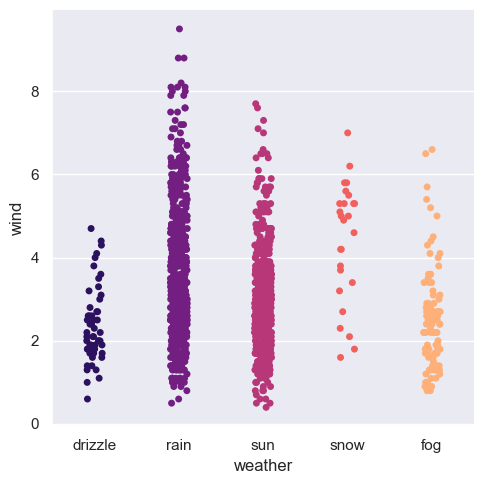

In [62]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=data,palette = "magma")
plt.show()

C:\Users\Shyam Surya G\AppData\Local\Temp\ipykernel_21800\1492132081.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")


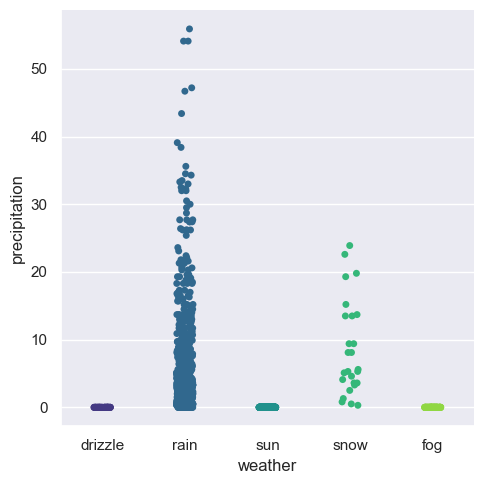

In [63]:
sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")
plt.show()

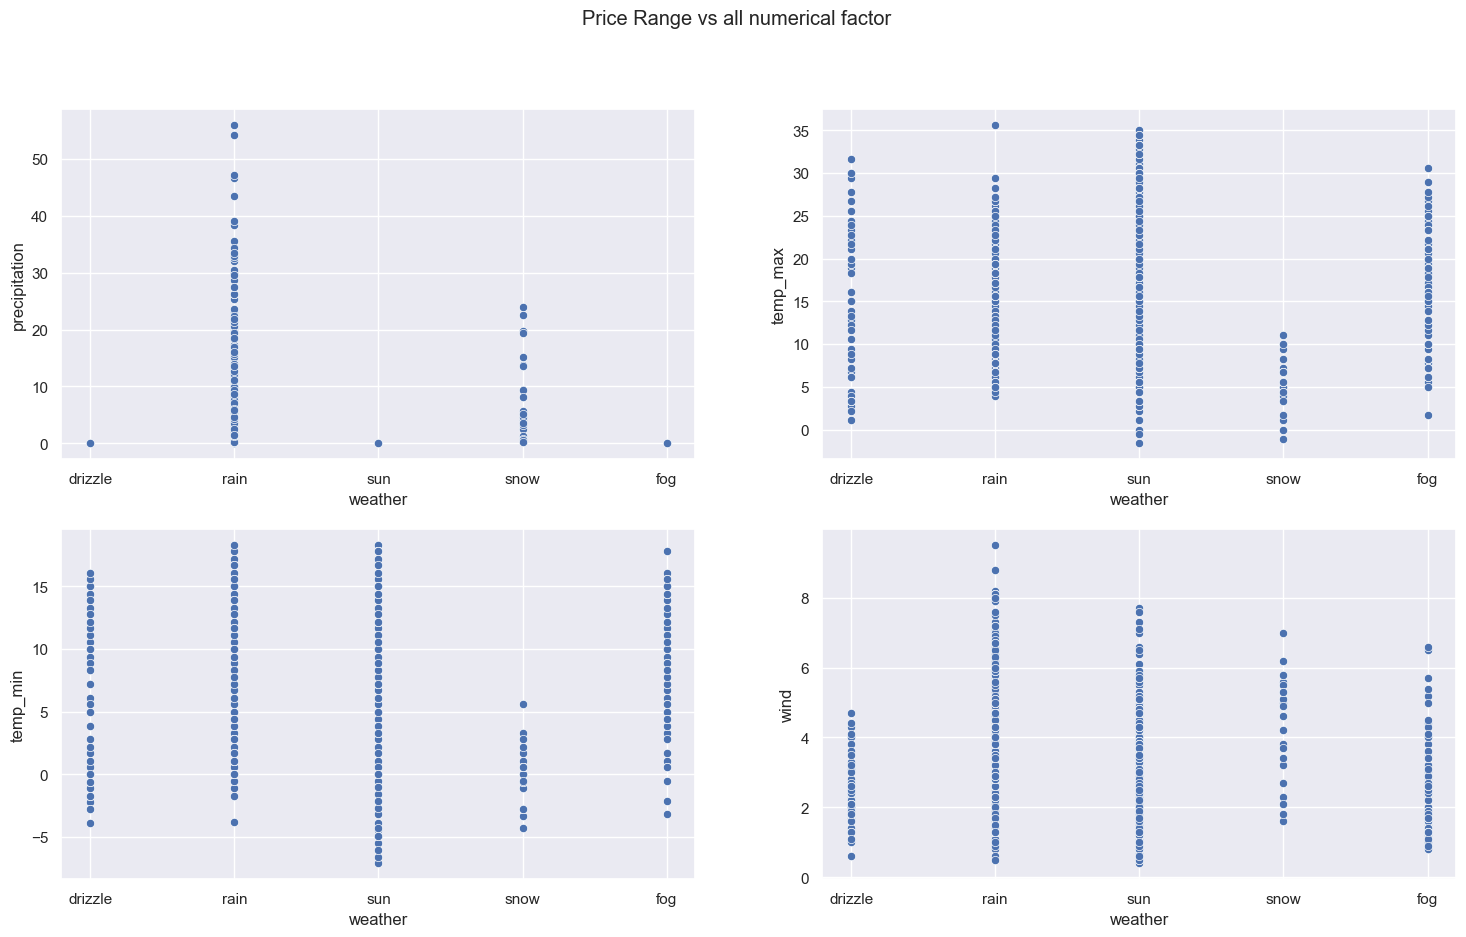

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
plt.show()

In [65]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [66]:
data = data.drop('date',axis=1)

In [67]:
x = data.drop('weather',axis=1)
y = data['weather']

# Split the dataset into train and test

In [69]:
data_names = ['precipitation', 'temp_max', 'temp_min', 'wind', 'weather']
data = pd.read_csv("seattle-weather.csv",names = data_names)
# remove the first row
data = data.iloc[1:]
data

,precipitation,temp_max,temp_min,wind,weather
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog
2015-12-30,0.0,5.6,-1.0,3.4,sun


In [80]:
all_vals = data[['precipitation', 'temp_max', 'temp_min', 'wind']].values
all_labels = data['weather'].values
unique_labels = np.unique(all_labels)
print(unique_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels
print(all_labels)

['drizzle' 'fog' 'rain' 'snow' 'sun']
[0. 2. 2. ... 1. 4. 4.]


In [71]:
from sklearn.model_selection import train_test_split
training_data, test_data, training_labels, test_labels =train_test_split(all_vals, all_labels, test_size = 0.25)

In [72]:
print(training_data.shape)
print(test_data.shape)
print(training_labels.shape)
print(test_labels.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


# Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_data = sc.fit_transform(training_data)
test_data = sc.transform(test_data)

In [104]:
def knnclassify(test_data, training_data, training_labels,k=7):
    #training_labels = [0, 1, 2] => ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
    
    #contains the predicted label for each test data point
    pred_labels=[]
    
    #for each test_data point
    for i in range(len(test_data)):
        distances = []
            
        #compute euclidean distance with all points of the training set
        for j in range(len(training_data)):
            euclidean_distance = np.linalg.norm(test_data[i]-training_data[j])
            #Pair each distance with the training label of the training data point
            distances.append([euclidean_distance, training_labels[j]]) 
                 
        #sort pairs by distances to get the K nearest neighbor(s) at the top
        distances.sort()
        
        #select number of k neighbors
        k_nearests = distances[0:k]
    
        #Collect vote/class_label for each nearest neighbor (k=3 there are 3 votes) 
        votes = [k_nearest[1] for k_nearest in k_nearests]
        
        #Store the most_common vote for each test data point into class_label_result
        class_label_result = Counter(votes).most_common()[0][0]
    
        #Append predicted label for the test data point into pred_labels
        pred_labels.append(class_label_result)
    
    return pred_labels

In [105]:
pred_labels = knnclassify(test_data, training_data, training_labels)
print(pred_labels)

[2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 1.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0,

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=test_labels, y_pred=pred_labels)

0.7158469945355191

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
print("Confusion Matrix:", confusion_matrix(test_labels, pred_labels))
print("Precision:", precision_score(test_labels, pred_labels,average='micro'))
print("Recall:", recall_score(test_labels, pred_labels, average='micro'))
print("F1 Score:", f1_score(test_labels, pred_labels,average='macro'))

Confusion Matrix: [[  1   1   0   0   7]
 [  1   3   4   0  20]
 [  2   1 132   0  41]
 [  0   0   2   3   0]
 [  4   5  21   1 117]]
Precision: 0.6994535519125683
Recall: 0.6994535519125683
F1 Score: 0.48659417330550825


# Logistic Regression